<img src='pics/otus.png'>

In [29]:
from __future__ import print_function
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pydot
import sklearn
from sklearn import preprocessing
from graphviz import Source


%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 8)
pd.options.display.float_format = '{:.2f}'.format

## Опрос в начале занятия
https://goo.gl/forms/oZxmCpwyA2ZYj2023

## План занятия.
- решающие деревья, общая парадигма
- критерии разбиения датасета
- специальные алгоритмы построения деревьев
- практические примеры
- домашнее задание

# Деревья решений

| Outlook | Temperature | Humidity | Wind | Play |
| --- | --- | --- | --- | --- |
|Sunny | 85 | 85 | false | no |
|Sunny | 80 | 90 | true | no |
|Overcast | 83 | 86 | false | yes |
|Rainy | 70 | 96 | false | yes |
|Rainy | 68 | 80 | false | yes |
|Rainy | 65 | 70 | true | no |
|Overcast | 64 | 65 | true | yes |
|Sunny | 72 | 95 | false | no |
|Sunny | 69 | 70 | false | yes |
|Rainy | 75 | 80 | false | yes |
|Sunny | 75 | 70 | true | yes |
|Overcast | 72 | 90 | true | yes |
|Overcast | 81 | 75 | false | yes |
|Rainy | 71 | 91 | true | no |

<img src="pics/golf.png">

<img src="pics/obama.jpg">

Формально, дерево решений - это связный ациклический граф. В нем можно выделить 3 типа вершин:
1. Корневая вершина (root node) -  откуда все начинается
2. Внутренние вершины (intermediate nodes)
3. Листья (leafs) - самые глубокие вершины дерева, в которых содержится "ответ"

Во внутренней или коневой вершине признак проверяется на некий логический критерий, по результатам которого мы движемся все глубже

<img src="pics/creditdecisiontree.png">

## Задание.
Перечислите плюсы и минусы логических алгоритмов классификации по сравнению с раннее изученными.

## Задание.

Какие проблемы возникают при построении логических алгоритмов классификации.

## Вопросы.

- как изобретать признаки?
- какие закономерности нужно использовать?
- как определить информативность?
- как строить закономерности?
- как объеденить несколько закономерностей в один алгоритм?

In [33]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [4]:
class PDF(object):
    def __init__(self, pdf, size=(200,200)):
        self.pdf = pdf
        self.size = size

    def _repr_html_(self):
        return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

    def _repr_latex_(self):
        return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

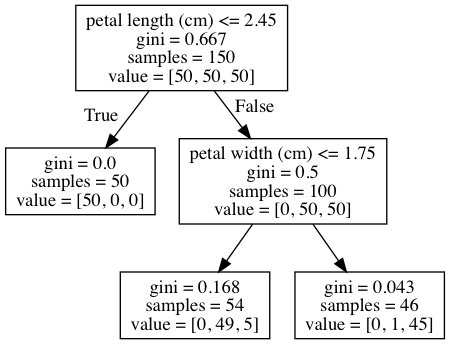

In [39]:
graph = Source(sklearn.tree.export_graphviz(tree_clf, out_file=None, feature_names=iris.feature_names[2:]))
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)

In [6]:
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO


golf = StringIO("""Outlook,Temperature,Humidity,Wind,Play
Sunny,85,85,false,no
Sunny,80,90,true,no
Overcast,83,86,false,yes
Rainy,70,96,false,yes
Rainy,68,80,false,yes
Rainy,65,70,true,no
Overcast,64,65,true,yes
Sunny,72,95,false,no
Sunny,69,70,false,yes
Rainy,75,80,false,yes
Sunny,75,70,true,yes
Overcast,72,90,true,yes
Overcast,81,75,false,yes
Rainy,71,91,true,no
""")

df = pd.read_csv(golf, sep=',')

In [7]:
df

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,85,85,False,no
1,Sunny,80,90,True,no
2,Overcast,83,86,False,yes
3,Rainy,70,96,False,yes
4,Rainy,68,80,False,yes
5,Rainy,65,70,True,no
6,Overcast,64,65,True,yes
7,Sunny,72,95,False,no
8,Sunny,69,70,False,yes
9,Rainy,75,80,False,yes


In [15]:
X = df[['Outlook', 'Temperature', 'Humidity', 'Wind']] 
y = df[['Play']]
tree_clf = DecisionTreeClassifier(max_depth=2)

X = preprocessing.OrdinalEncoder().fit_transform(X)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

d = defaultdict(LabelEncoder)
X = np.c_[
    df[['Outlook', 'Wind']].apply(lambda x: d[x.name].fit_transform(x)).as_matrix(),
    df[['Temperature', 'Humidity']].as_matrix()
]
y = df[['Play']].as_matrix()
print(X)
print(y)

[[ 2  0 85 85]
 [ 2  1 80 90]
 [ 0  0 83 86]
 [ 1  0 70 96]
 [ 1  0 68 80]
 [ 1  1 65 70]
 [ 0  1 64 65]
 [ 2  0 72 95]
 [ 2  0 69 70]
 [ 1  0 75 80]
 [ 2  1 75 70]
 [ 0  1 72 90]
 [ 0  0 81 75]
 [ 1  1 71 91]]
[['no']
 ['no']
 ['yes']
 ['yes']
 ['yes']
 ['no']
 ['yes']
 ['no']
 ['yes']
 ['yes']
 ['yes']
 ['yes']
 ['yes']
 ['no']]


/Users/an/Projects/otus/otus-datamining/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/an/Projects/otus/otus-datamining/venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/Users/an/Projects/otus/otus-datamining/venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [17]:
o = d['Outlook']

In [18]:
o.classes_

array(['Overcast', 'Rainy', 'Sunny'], dtype=object)

In [19]:
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

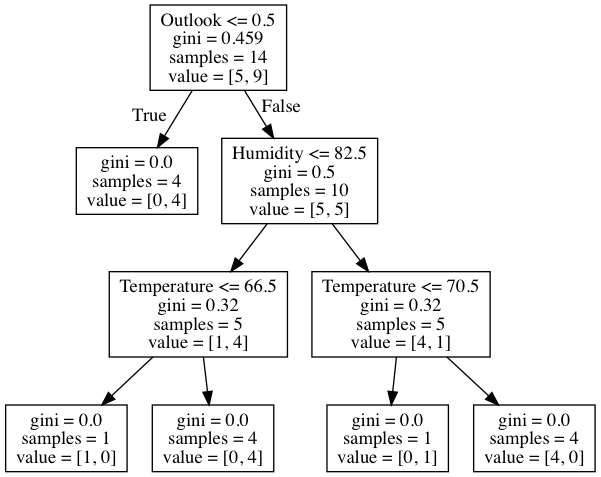

In [31]:
graph = Source(sklearn.tree.export_graphviz(tree_clf, out_file=None, feature_names=['Outlook', 'Wind', 'Temperature', 'Humidity']))
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)

<img src="pics/golf.png">

In [58]:
d['Outlook'].classes_

array(['Overcast', 'Rainy', 'Sunny'], dtype=object)

# Псевдокод алгоритма

```{python}
function decision_tree(X_N):
	if X_N satisfies leaf criterion:
		L = create_leaf(X_N)
		assign_class(L)
	else:
		L = create_node(X_N)
		X_1,..,X_S = split(L)
		for i in 1..S:
			C = decision_tree(X_i)
			add_child(L, C)
	return L  
```

# CART - Classification And Regression Trees
1. Как происходит разделение?
2. На сколько детей разделять каждый узел?
3. Какой критерий листа выбрать?
4. Как выбрать класс каждого листа?
5. Что делать, если часть значений отсутствует?

## Задание.
Как посчитать качество данного правила?

# Как делать разбиение?

<img src="pics/DT1.png">

<img src="pics/DT2.png">

<img src="pics/DT3.png">

<img src="pics/DT4.png">

<img src="pics/DT5.png">

<img src="pics/DT6.png">

### Меры неопределенности (impurity measures)

Пусть $p_k$ - это доля класса $C_k$ в узле дерева $S$.

1. Missclassification error  
$$i(N) = 1 - \max_k p(x \in C_k)$$
2. Gini
$$i(N) = 1 - \sum_k p^2(x \in C_k) = \sum_{i \neq j} p(x \in C_i) p(x \in C_j)$$
3. Информационная энтропия
$$i(N) =  -\sum_k p(x \in C_k) \log_2 p(x \in C_k)$$


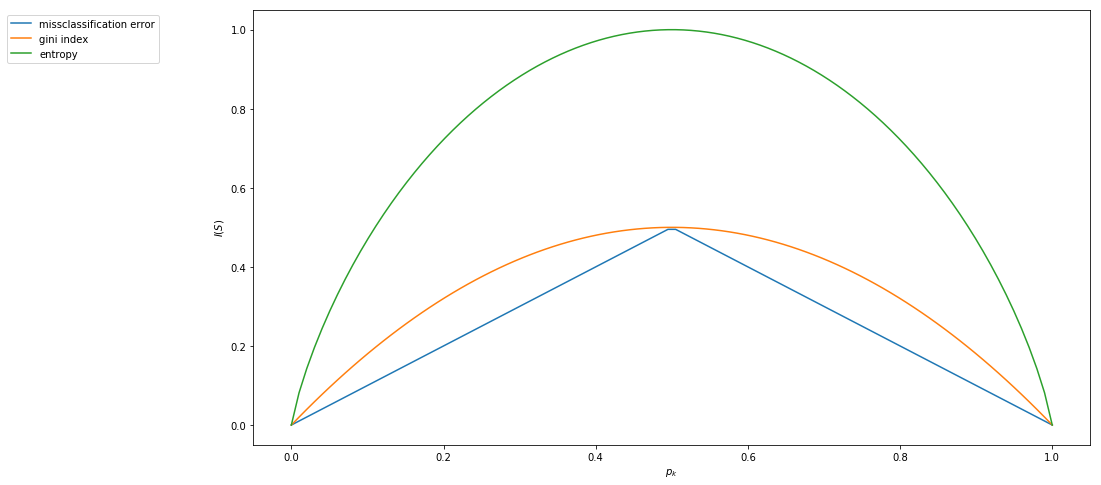

In [65]:
def plot_impurities():
    threshold = 0.000001
    p = np.linspace(0, 1, 100)
    p = np.c_[p, 1-p]

    missclass = 1 - p.max(axis=1)
    plt.plot(p[:,0], missclass, label = 'missclassification error')

    gini = 1 - (p ** 2).sum(axis=1)
    plt.plot(p[:,0], gini, label = 'gini index')

    entropy = - np.nansum((p * np.log2(np.clip(p, threshold, 1 - threshold))), axis=1)
    plt.plot(p[:,0], entropy, label = 'entropy')

    plt.xlabel('$p_k$')
    plt.ylabel('$I(S)$')
    # plt.legend(loc=2, bbox_to_anchor=(0.,0.))
    plt.legend(loc=2, bbox_to_anchor=(-0.3,1))
    
plot_impurities()

<img src="pics/DS1.png">

In [142]:
n = 10.

<img src="pics/DS3.png">

In [143]:
ME_1_left = 1 - 5./5
ME_1_left # 0

0.0

In [144]:
ME_1_right = 1 - 3 / 5.
ME_1_right # 4/10

0.4

<img src="pics/DS2.png">

In [145]:
ME_2_left = 1 - 7./7
ME_2_left

0.0

In [146]:
ME_2_right = 1 - 3./3
ME_2_right

0.0

<img src="pics/DS1.png">

In [147]:
ME_all = 1 - 7. / 10
ME_all

0.30000000000000004

### Прирост информации

Выбрать признак и точку отсечения такими, чтобы было максимально уменьшение $impurity$
$$Information Gain = \Delta i(N, N_L, N_R) = i(N) - \frac {N_L}{N} i(N_L) - \frac {N_R}{N} i(N_R)$$

* Стратегия выбора - жадная
* Как определяется порог при вещественных признаках?
* Локальная оптимизация - уменьшение Impurity внутри узла
* Результаты не сильно зависят от выбора самой меры неопределенности




In [148]:
# 1
ME_all - ((5 / n) * ME_1_left + (5 / n) * ME_1_right)

0.10000000000000003

In [154]:
(5 / n) * ME_1_left, (5 / n) * ME_1_right

(0.0, 0.2)

In [149]:
# 2
ME_all - ((7 / n) * ME_2_left + (3 / n) * ME_2_right)

0.30000000000000004

In [156]:
(7 / n) * ME_2_left, (3 / n) * ME_2_right

(0.0, 0.0)

## Рассчет разбиения в выборке

In [161]:
df[['Temperature', 'Play']]

,Temperature,Play
0,85,no
1,80,no
2,83,yes
3,70,yes
4,68,yes
5,65,no
6,64,yes
7,72,no
8,69,yes
9,75,yes


In [165]:
df[['Temperature', 'Play']].sort_values('Temperature')

,Temperature,Play
6,64,yes
5,65,no
4,68,yes
8,69,yes
3,70,yes
13,71,no
7,72,no
11,72,yes
9,75,yes
10,75,yes


Сколько вариантов разбиений нужно посчитать?

### Если разделение не бинарное

Естественный выбор при разделении на $B$ детей
$$\Delta i(N, N_1, \ldots, N_B) = i(N) - \sum_{k=1}^B \frac{N_k}{N} i(N_k) \rightarrow \max$$

Предпочтение отдается большим $B$. Модификация:
$$\Delta i_B(N, N_1, \ldots, N_B) = \frac{\Delta i(N, N_1, \ldots, N_B)}{-\sum_{k=1}^B \frac{N_k}{N} \log_2 \frac{N_k}{N}} \rightarrow \max$$


## Задание.

Проблемой данного алгоритма является переобучение. Каким образом можно избежать переобучения?

## Критерии останова (регуляризация)

* Никогда
* Задать порог по мере неопределенности: $I(S) \leq \theta$
* Задать порог по размеру узла: $|S| \leq n$
* Задать порог на глубину: $Depth(S) = d$
* Задать порог на размер потомков: $|S_L| \leq n_1 \& |S_R| \leq n_2$
* Использовать валидационную выборку
* ...

## Регрессия

Для задачи регрессии в качестве меры неопределенности могут выступать

* Среднее квадратичное отклонение от среднего
$$ I(S) = \frac{1}{|S|}\sum\limits_{i \in S}(y_i - \bar{y_S})^2 $$
* Среднее абсолютное отклонение от медианы
$$ I(S) = \frac{1}{|S|}\sum\limits_{i \in S}|y_i - \bar{y_S}| $$

<img src="pics/housing.png">

## Как определяется ответ?

* Классификация
    * Класс с большинством в листе
    * Доли каждого из классов в листе
* Регрессия
    * Среднее (медиана) целевой переменной в листе

# Demo
http://www.r2d3.us/visual-intro-to-machine-learning-part-1/

## Важность признаков

В деревьях решений производится автоматический отбор признаков.

Пусть $v(S)$ - это признак, который использовался для ветвления в узле $S$

$$ \text{imp}(A) = \sum\limits_{i: v(S_i) = A} \frac{|S_i|}{|S|} Gain(S_i, A) $$

## Вычислительная сложность

Выборка состоит из $n$ объектов, описанных $m$ признаками

Предположения
* Узлы делятся примерно поровну
* Дерево имеет $\log n$ уровней
* Признаки бинарные

Обучение. Для узла с $k$ обучающими объектами:

Вычисление impurity по одному признаку $O(k)$

Выбор разделяющего признака $O(mk)$

Итог: $O(mn) + 2 O(m \frac{n}{2}) + 4 O(m \frac{n}{4}) + \ldots = O(m n \log n)$

Применение. $O(\log n)$

## Отсутствующие значения

* Удалить объекты из выборки
* Использовать отстутсвие как отдельную категорию
* Вычислять impurity, пропуская отсутствующие значения
* Surrogate splits: разделяем вторым признаком так, чтобы было максимально похоже на первичное разделение


## Специальные алгоритмы построения деревьев
 
 
** ID 3 **
* Только категориальные признаки
* Количество потомков = количеству значений признака
* Строится до максимальной глубины

** С 4.5 **
* Поддержка вещественных признаков
* Категриальные как в ID3
* При пропуске значения переход по всем потомкам
* Удаляет избыточные ветвления

** СART **
* В основном сегодняшнее занятие про него
* Специальная процедура усещения дерева после построения (post prunning)

** Преимущества **
* Простота построения
* Интерпретируемость (при небольшой глубине)
* Требуются минимальная предобработка признаков
* Встроенный отбор признаков



** Недостатки **
* Границы строяется только параллельно или перпендикулярно осям признаков
* При изменении набора данных надо полностью перестраивать и результат может получится совершенно иным
* Жадность построения

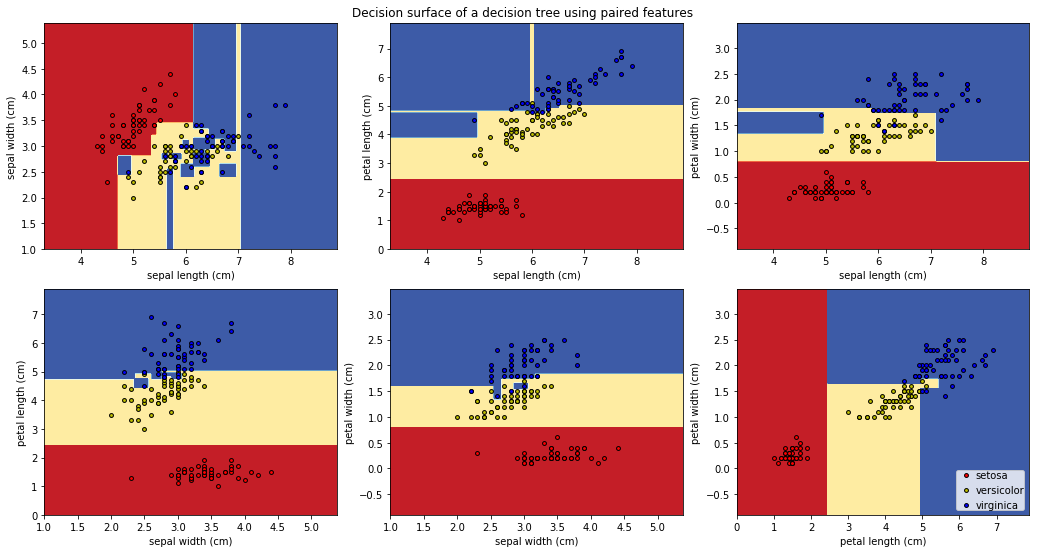

In [167]:
# http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

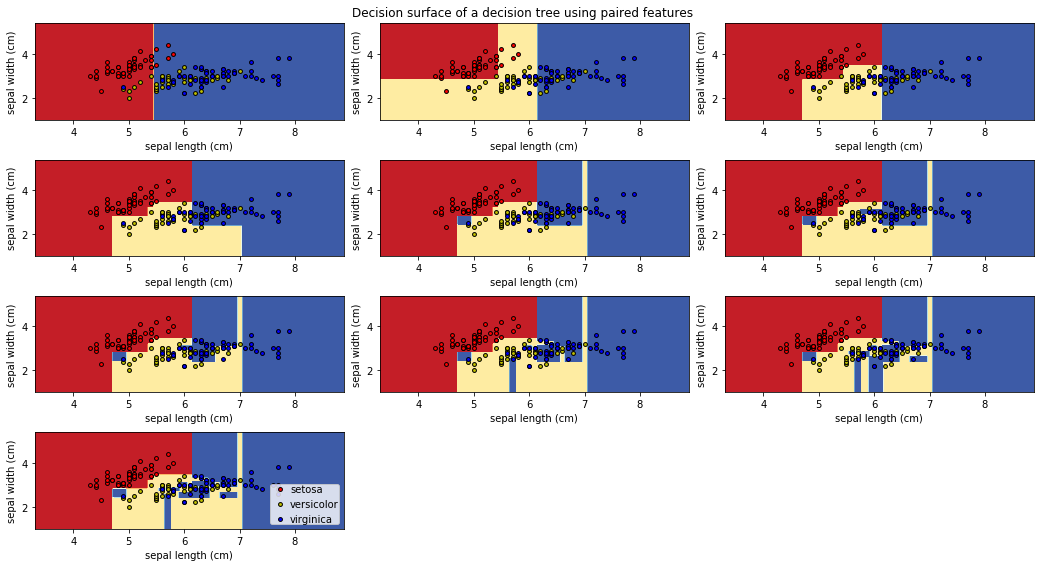

In [171]:

pair = [0, 1]
# We only take the two corresponding features
X = iris.data[:, pair]
y = iris.target

for d in range(10):
    # Train
    clf = DecisionTreeClassifier(max_depth=d+1).fit(X, y)

    # Plot the decision boundary
    plt.subplot(4, 3, d + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

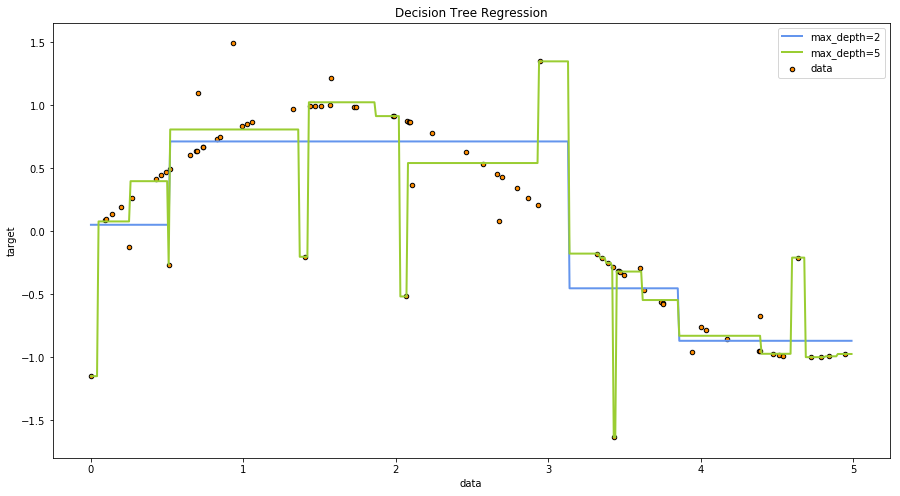

In [172]:
# http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# Материалы
* https://habrahabr.ru/company/ods/blog/322534/#derevo-resheniy
* Aurélien Géron Hands-on Machine Learning with Scikit-Learn and TensorFlow Глава 6
* http://www.machinelearning.ru/wiki/images/archive/9/97/20140227072517!Voron-ML-Logic-slides.pdf

## Опрос в конце занятия
https://goo.gl/forms/ep59fEH2aIp3dxWC3

##  Фидбек

https://otus.ru/polls/2749/